In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the entire Excel file
xls = pd.ExcelFile('Stocks_analysis.xlsx')

# Check sheet names
print(xls.sheet_names)


['MSFT', 'Tesla', 'Apple', 'SP500', 'combined']


In [551]:
# Load individual sheets into separate dataframes
msft_df = pd.read_excel(xls, sheet_name='MSFT')
tesla_df = pd.read_excel(xls, sheet_name='Tesla')
apple_df = pd.read_excel(xls, sheet_name='Apple')
sp500_df = pd.read_excel(xls, sheet_name='SP500')
combined_df = pd.read_excel(xls, sheet_name='combined')# Histogram stock prices



# Check the first few rows of each dataframe to verify the data
print(msft_df.head())
print(tesla_df.head())
print(apple_df.head())
print(sp500_df.head())
print(combined_df.head())

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2018-01-02  86.129997  86.309998  85.500000  85.949997  80.940384  22483800   
1 2018-01-03  86.059998  86.510002  85.970001  86.349998  81.317093  26061400   
2 2018-01-04  86.589996  87.660004  86.570000  87.110001  82.032776  21912000   
3 2018-01-05  87.660004  88.410004  87.430000  88.190002  83.049843  23407100   
4 2018-01-08  88.199997  88.580002  87.599998  88.279999  83.134590  22113000   

   MS%change  Unnamed: 8  Unnamed: 9  
0        NaN         NaN         NaN  
1  -0.000813         NaN    4.742905  
2   0.006158         NaN         NaN  
3   0.012357         NaN         NaN  
4   0.006160         NaN         NaN  
        Date       Open       High        Low      Close  Adj Close  \
0 2018-01-02  20.799999  21.474001  20.733334  21.368668  21.368668   
1 2018-01-03  21.400000  21.683332  21.036667  21.150000  21.150000   
2 2018-01-04  20.858000  21.236668  20.378668  20.974667  20.97466

In [552]:
# Function to calculate descriptive statistics for a stock's 'Close' prices
def stock_statistics(df, stock_name, close_col):
    stats = {
        'Stock': stock_name,
        'Mean': df[close_col].mean(),
        'Median': df[close_col].median(),
        'Mode': df[close_col].mode()[0] if not df[close_col].mode().empty else 'No mode',
        'Count': df[close_col].count(),
        'Max': df[close_col].max(),
        'Min': df[close_col].min(),
        'Variance': df[close_col].var(),
        'Std Dev': df[close_col].std()
    }
    return pd.DataFrame(stats, index=[stock_name])

# Calculate statistics for each stock with the correct column name
msft_stats = stock_statistics(msft_df, 'MSFT', 'Close')  # 'Close' for MSFT
tesla_stats = stock_statistics(tesla_df, 'Tesla', 'Close')  # 'Close' for Tesla
apple_stats = stock_statistics(apple_df, 'Apple', 'Close')  # 'Close' for Apple
sp500_stats = stock_statistics(sp500_df, 'SP500', 'Close')  # 'Close*' for SP500

# Combine stats into one table
all_stats = pd.concat([msft_stats, tesla_stats, apple_stats, sp500_stats])
print(all_stats)


       Stock         Mean       Median         Mode  Count          Max  \
MSFT    MSFT   194.510548   203.050003    92.330002   1278   343.109985   
Tesla  Tesla   131.790281    97.640004    14.641333   1278   409.970001   
Apple  Apple    98.646516    95.615002   145.860001   1278   182.009995   
SP500  SP500  3457.230055  3298.025000  2723.060000   1278  4796.560000   

               Min       Variance     Std Dev  
MSFT     85.010002    5511.864378   74.241931  
Tesla    11.931333   13684.080793  116.978976  
Apple    35.547501    2133.617820   46.191101  
SP500  2237.400000  444593.791085  666.778667  


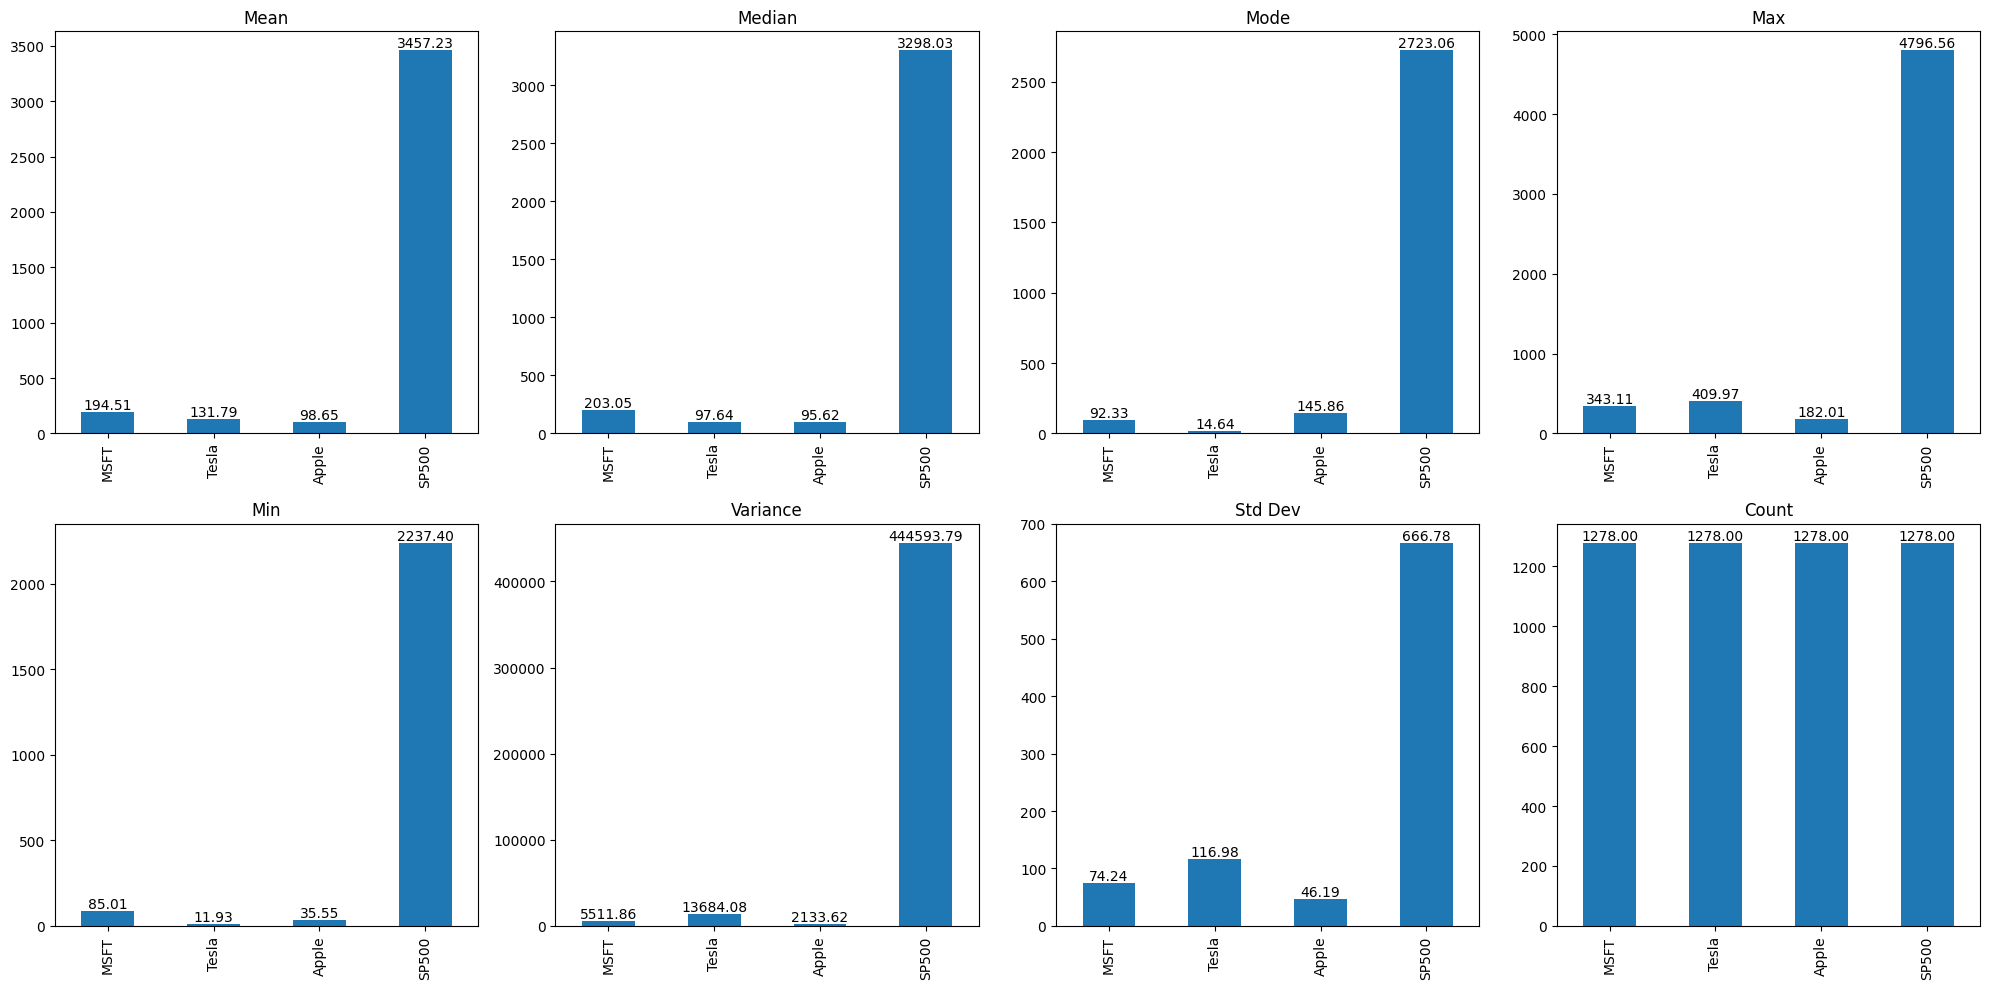

In [553]:
# Transpose the DataFrame to make it easier to plot
all_stats_plot = all_stats.transpose()

# Drop 'Stock' row as it's not a numerical value
all_stats_plot = all_stats_plot.drop('Stock', axis=0)

# Create subplots for each statistic
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define statistics to plot
stats_to_plot = ['Mean', 'Median', 'Mode', 'Max', 'Min', 'Variance', 'Std Dev', 'Count']

# Iterate over statistics and plot each one
for i, stat in enumerate(stats_to_plot):
    # Plot the bar chart
    all_stats_plot.loc[stat].plot(kind='bar', ax=axes[i], title=stat)
    
    # Add data labels on top of each bar
    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2.,  # X position
            height,  # Y position (height of the bar)
            f'{height:.2f}',  # Format the label with 2 decimal places
            ha='center',  # Center the text horizontally
            va='bottom'   # Vertical alignment just below the top of the bar
        )

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot.png')
plt.show()


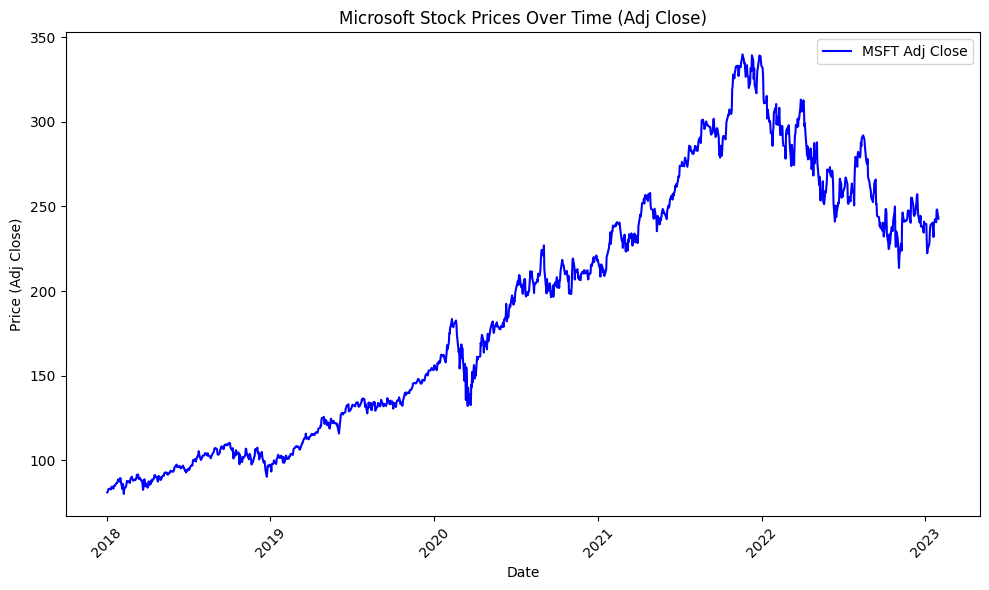

In [554]:
# line plot of date vs adjusted close price for Microsoft
plt.figure(figsize=(10, 6))
plt.plot(msft_df['Date'], msft_df['Adj Close'], color='blue', label='MSFT Adj Close')
plt.title('Microsoft Stock Prices Over Time (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot1.png')
plt.show()


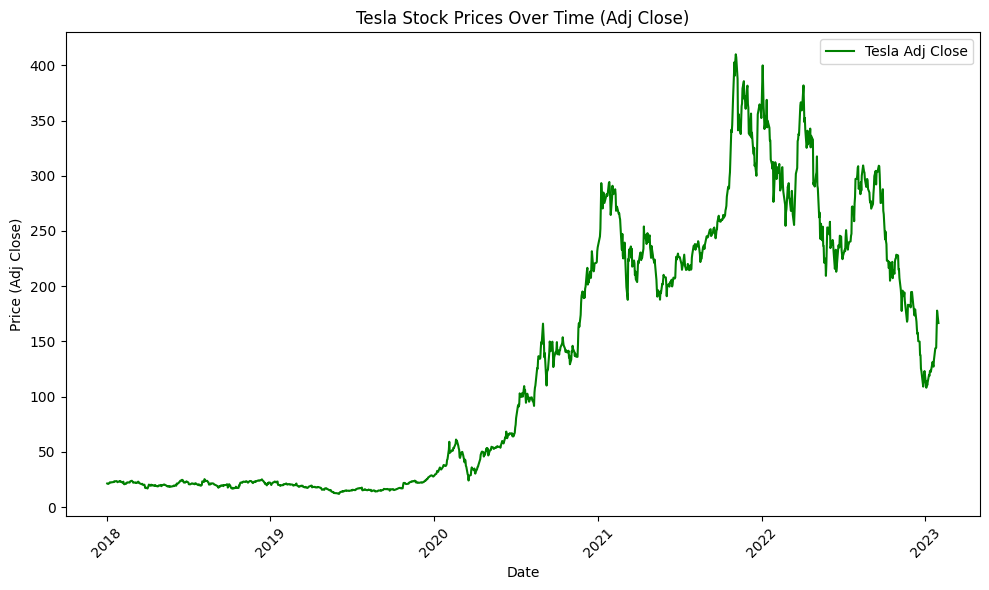

In [555]:
# line plot of date vs adjusted close price for Tesla
plt.figure(figsize=(10, 6))
plt.plot(tesla_df['Date'], tesla_df['Adj Close'], color='green', label='Tesla Adj Close')
plt.title('Tesla Stock Prices Over Time (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot2.png')
plt.show()


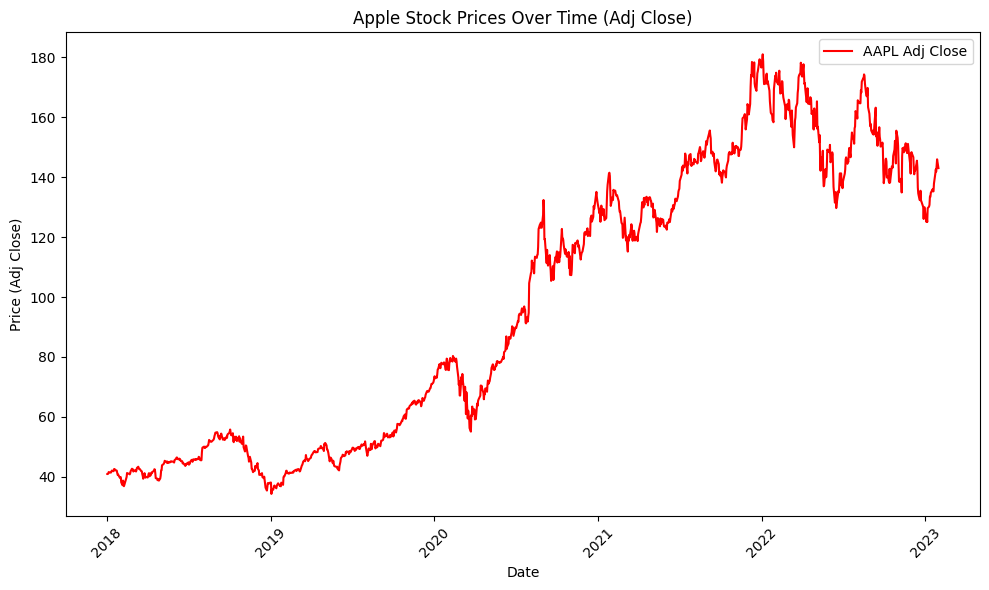

In [556]:
# Line plot for Apple's Adj Close Prices over time
plt.figure(figsize=(10, 6))
plt.plot(apple_df['Date'], apple_df['Adj Close'], label='AAPL Adj Close', color='red')
plt.title('Apple Stock Prices Over Time (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot3.png')
plt.show()


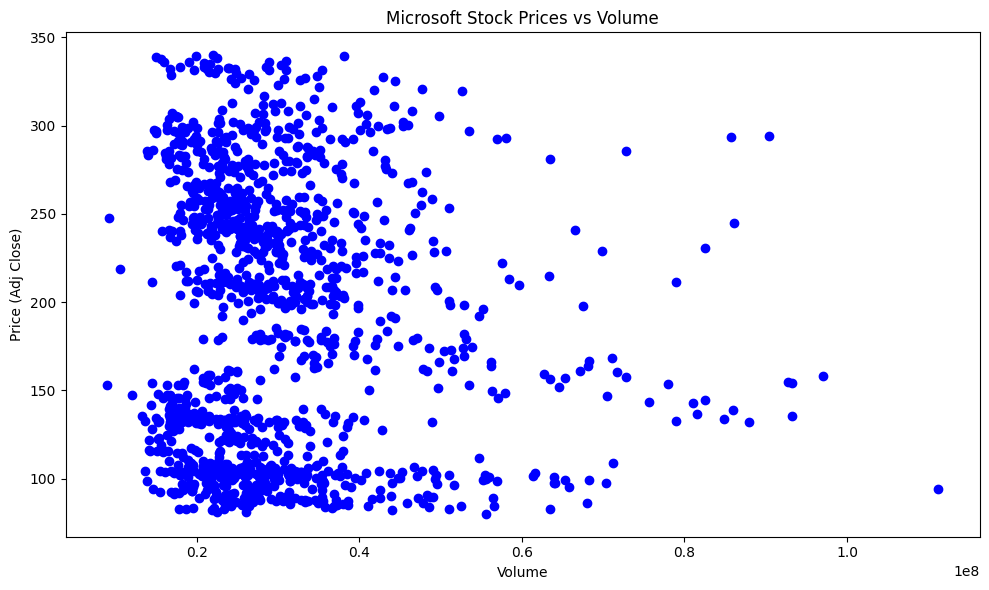

In [557]:
# Scatter plot of volume vs stock price for Microsoft
plt.figure(figsize=(10, 6))
plt.scatter(msft_df['Volume'], msft_df['Adj Close'], color='blue')
plt.title('Microsoft Stock Prices vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price (Adj Close)')
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot4.png')
plt.show()


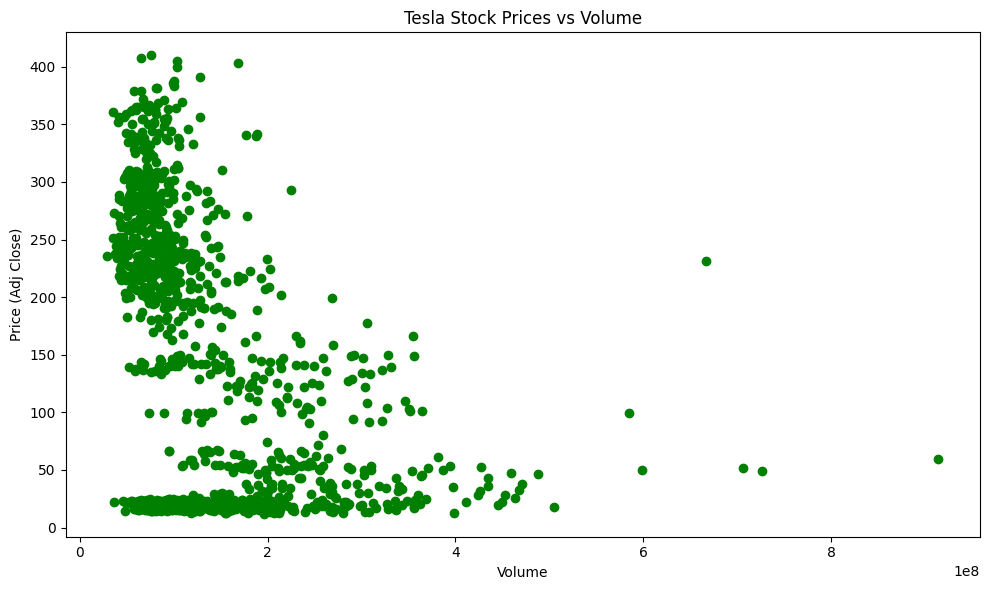

In [558]:
# Scatter plot of volume vs stock price for Tesla
plt.figure(figsize=(10, 6))
plt.scatter(tesla_df['Volume'], tesla_df['Adj Close'], color='green')
plt.title('Tesla Stock Prices vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price (Adj Close)')
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot5.png')
plt.show()


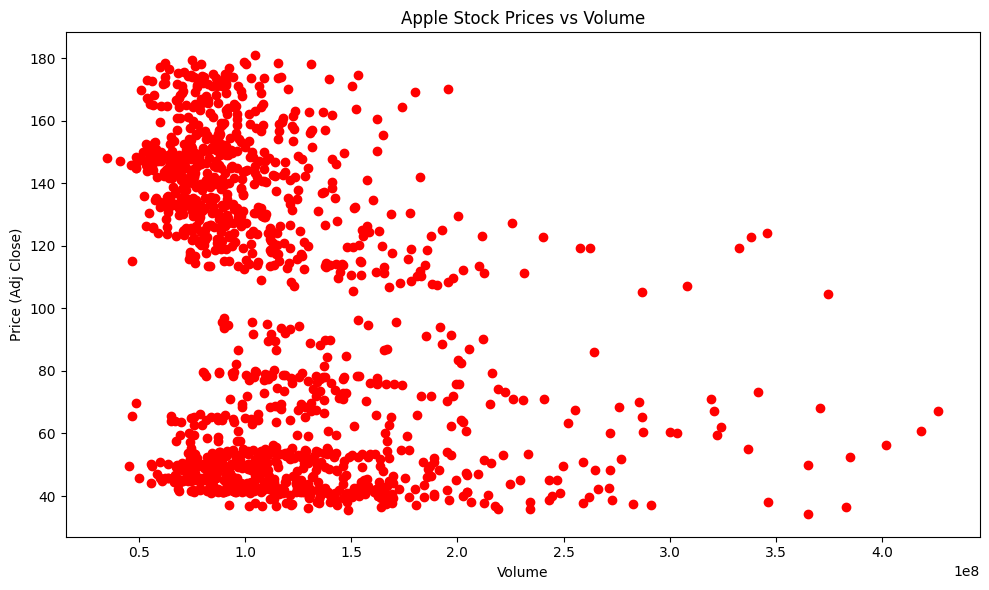

In [559]:
# Scatter plot of volume vs stock price for Apple
plt.figure(figsize=(10, 6))
plt.scatter(apple_df['Volume'], apple_df['Adj Close'], color='red')
plt.title('Apple Stock Prices vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price (Adj Close)')
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot6.png')
plt.show()


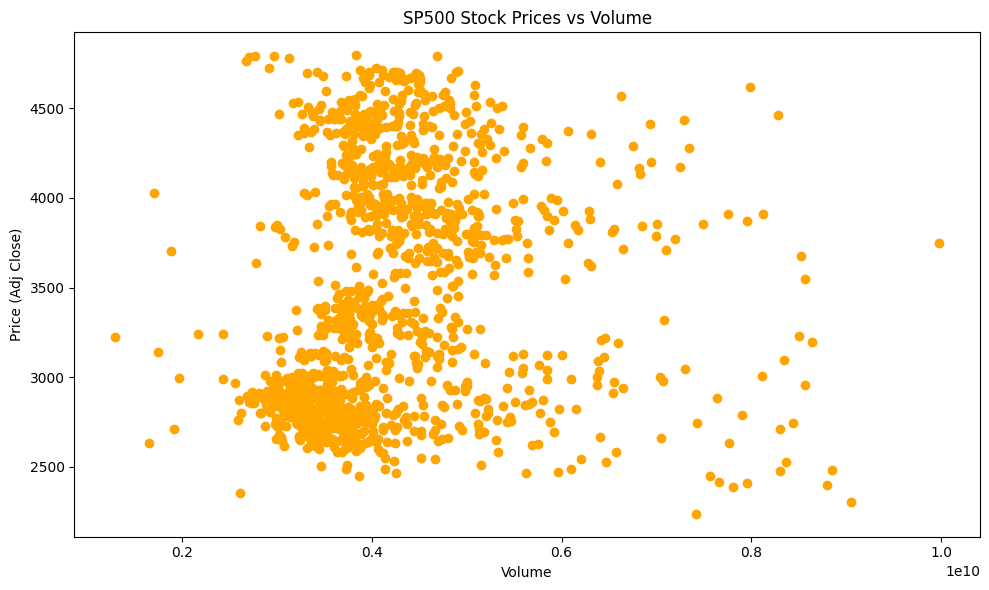

In [560]:
# Scatter plot of volume vs stock price for SP500
plt.figure(figsize=(10, 6))
plt.scatter(sp500_df['Volume'], sp500_df['Adj Close'], color='orange')
plt.title('SP500 Stock Prices vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price (Adj Close)')
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot7.png')
plt.show()


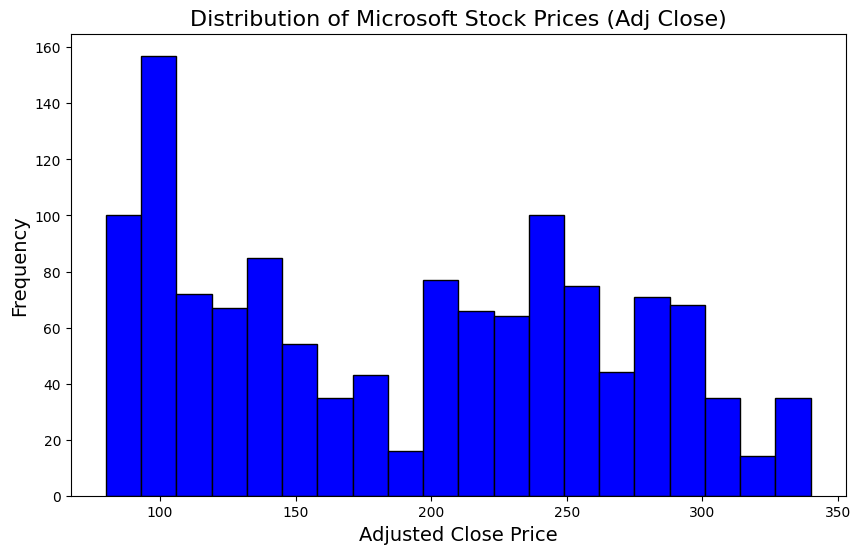

In [561]:
# Histogram for microsoft 'Adj Close' prices
msft_prices = msft_df['Adj Close']
plt.figure(figsize=(10,6))
plt.hist(msft_prices, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Microsoft Stock Prices (Adj Close)', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig(r'C:\Users\kaspg\Desktop\plot8.png')
plt.show()

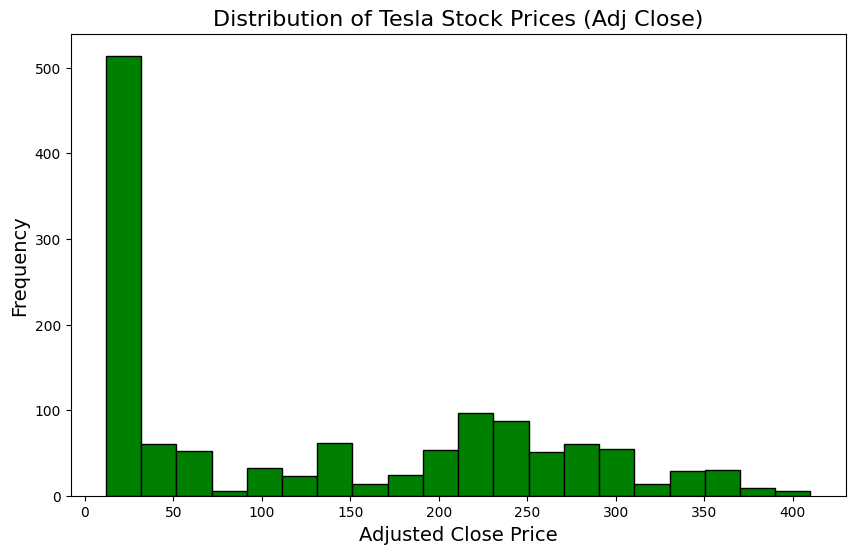

In [562]:
# Histogram for Tesla 'Adj Close' prices
tesla_prices = tesla_df['Adj Close']
plt.figure(figsize=(10,6))
plt.hist(tesla_prices, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Tesla Stock Prices (Adj Close)', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig(r'C:\Users\kaspg\Desktop\plot9.png')
plt.show()


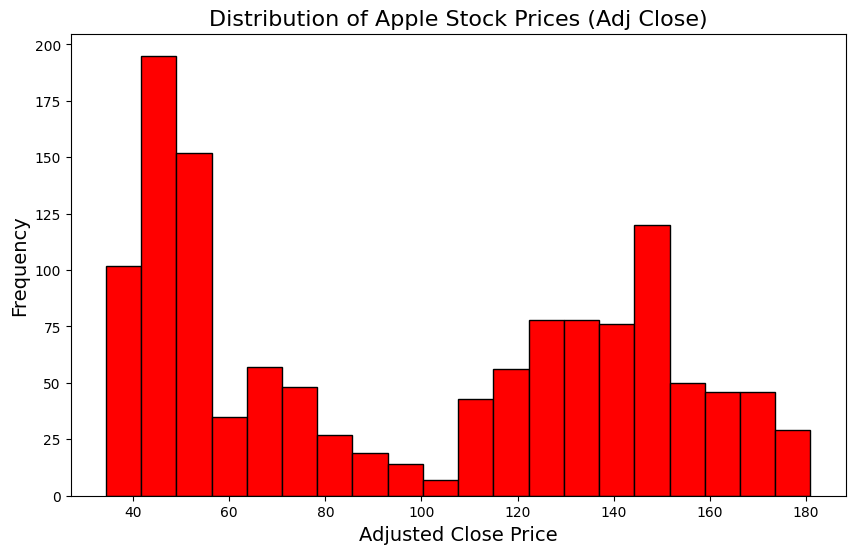

In [563]:
# Histogram for Apple 'Adj Close' prices
apple_prices = apple_df['Adj Close']
plt.figure(figsize=(10,6))
plt.hist(apple_prices, bins=20, color='red', edgecolor='black')
plt.title('Distribution of Apple Stock Prices (Adj Close)', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig(r'C:\Users\kaspg\Desktop\plot9.png')
plt.show()

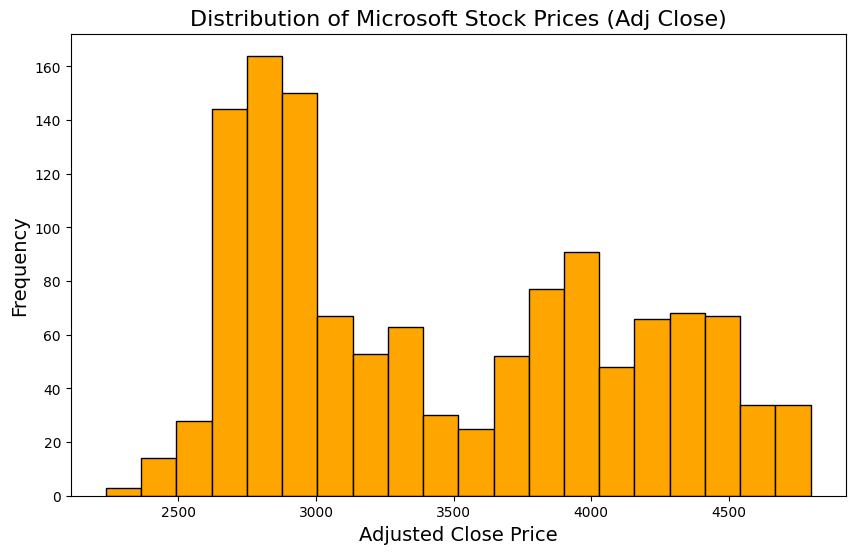

In [564]:
# Histogram for SP500 'Adj Close' prices
sp500_prices = sp500_df['Adj Close']
plt.figure(figsize=(10,6))
plt.hist(sp500_prices, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Microsoft Stock Prices (Adj Close)', fontsize=16)
plt.xlabel('Adjusted Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig(r'C:\Users\kaspg\Desktop\plot10.png')
plt.show()

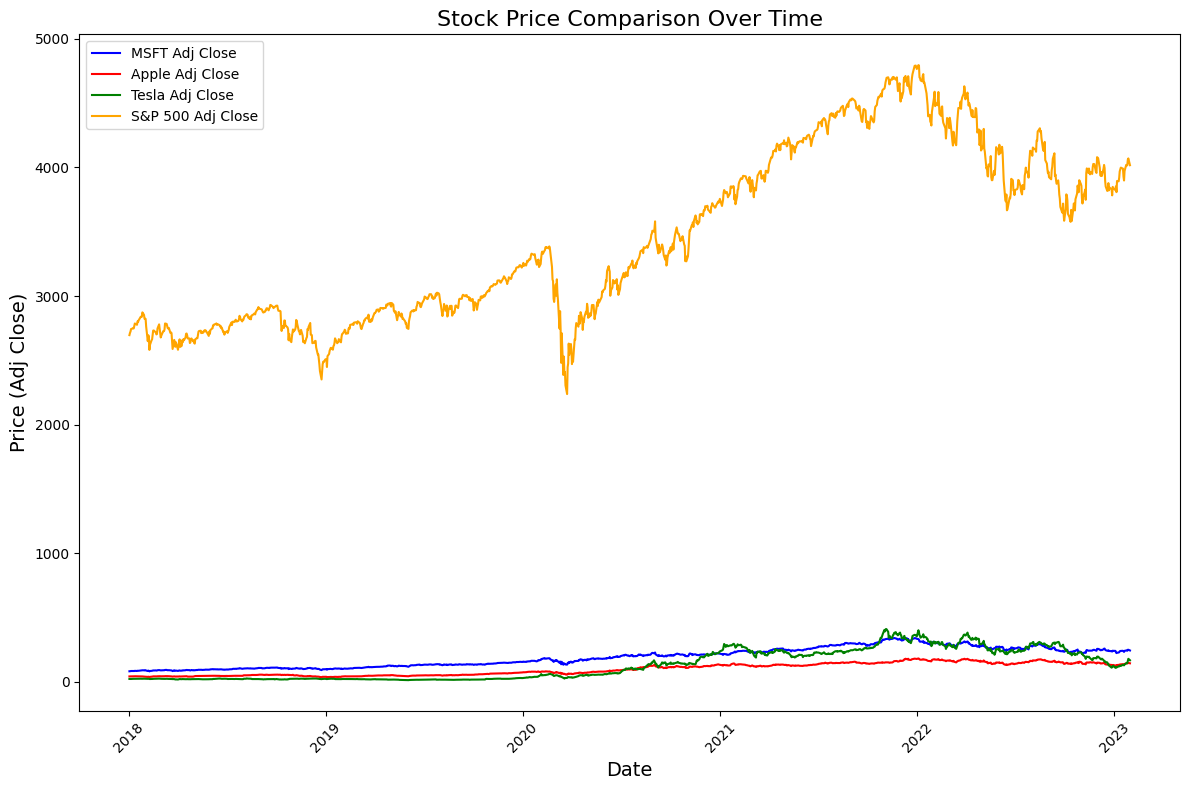

In [565]:
# Ensure the 'Date' column is in datetime format for all DataFrames
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

# Create a plot for stock prices comparison over time
plt.figure(figsize=(12, 8))

plt.plot(msft_df['Date'], msft_df['Adj Close'], label='MSFT Adj Close', color='blue')
plt.plot(apple_df['Date'], apple_df['Adj Close'], label='Apple Adj Close', color='red')
plt.plot(tesla_df['Date'], tesla_df['Adj Close'], label='Tesla Adj Close', color='green')
plt.plot(sp500_df['Date'], sp500_df['Adj Close'], label='S&P 500 Adj Close', color='orange')

# Setting title and labels
plt.title('Stock Price Comparison Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Adj Close)', fontsize=14)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot11.png')
plt.show()


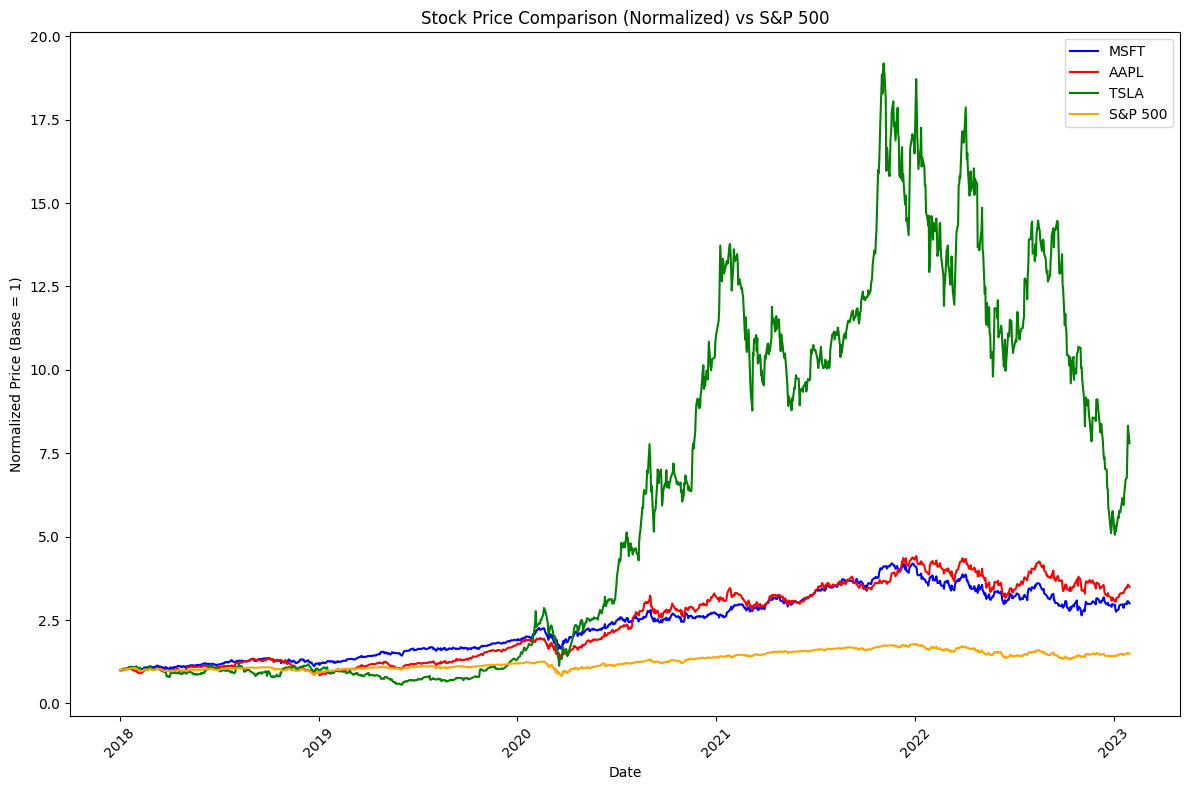

In [566]:
# Normalize stock prices by dividing by the first value in the 'Adj Close' column
msft_df['Normalized'] = msft_df['Adj Close'] / msft_df['Adj Close'].iloc[0]
apple_df['Normalized'] = apple_df['Adj Close'] / apple_df['Adj Close'].iloc[0]
tesla_df['Normalized'] = tesla_df['Adj Close'] / tesla_df['Adj Close'].iloc[0]
sp500_df['Normalized'] = sp500_df['Adj Close'] / sp500_df['Adj Close'].iloc[0]

# Plot the normalized stock prices
plt.figure(figsize=(12, 8))

plt.plot(msft_df['Date'], msft_df['Normalized'], label='MSFT', color='blue')
plt.plot(apple_df['Date'], apple_df['Normalized'], label='AAPL', color='red')
plt.plot(tesla_df['Date'], tesla_df['Normalized'], label='TSLA', color='green')
plt.plot(sp500_df['Date'], sp500_df['Normalized'], label='S&P 500', color='orange')

# Add labels and title
plt.title('Stock Price Comparison (Normalized) vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base = 1)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot12.png')
plt.show()


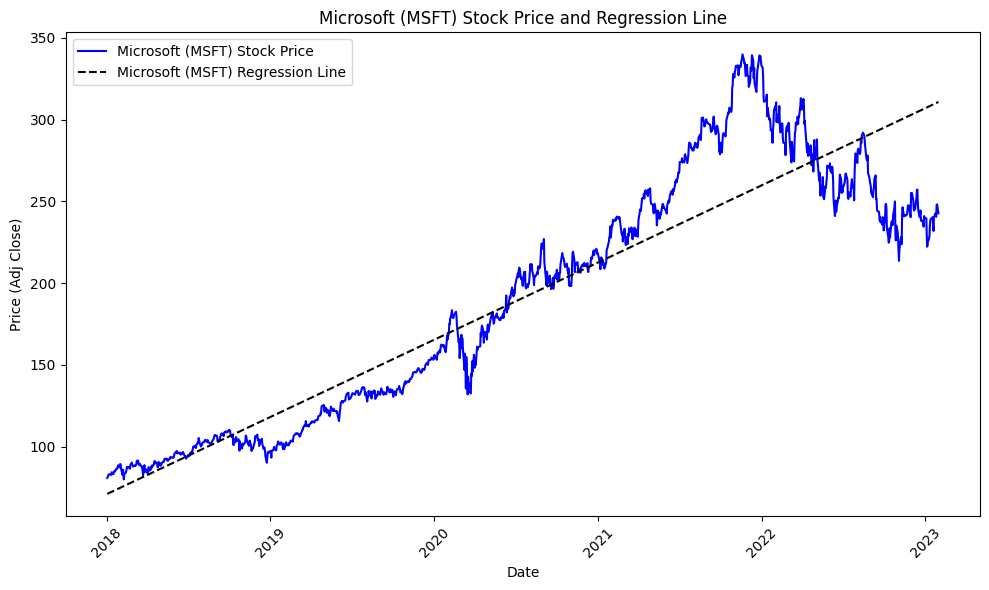

Regression Analysis for Microsoft (MSFT):
Slope (Trend): 0.1292521398313135
Intercept: -95148.38640541837



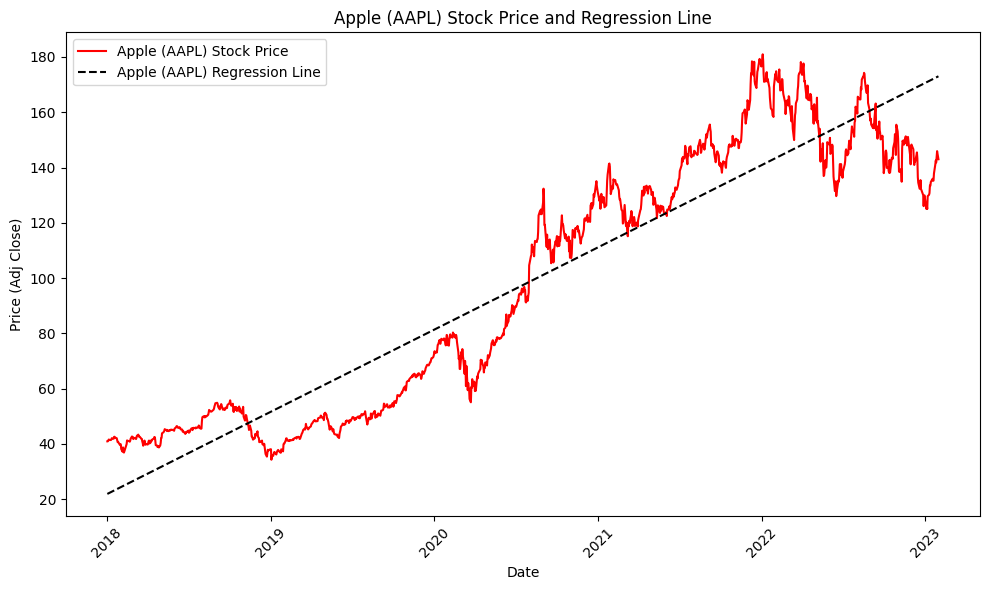

Regression Analysis for Apple (AAPL):
Slope (Trend): 0.08148598222529631
Intercept: -60008.45946450514



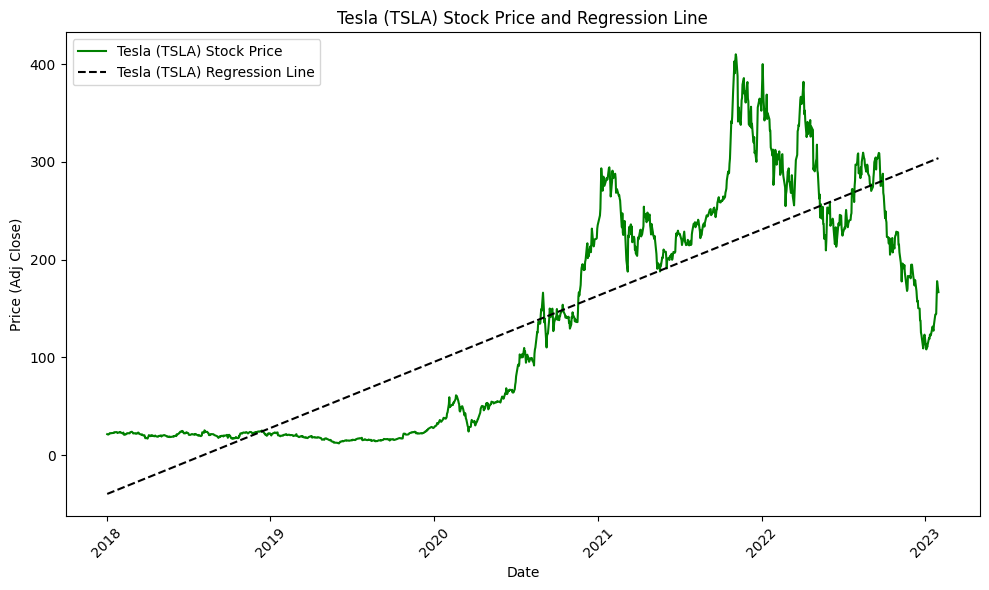

Regression Analysis for Tesla (TSLA):
Slope (Trend): 0.18526960379203672
Intercept: -136527.1329398539



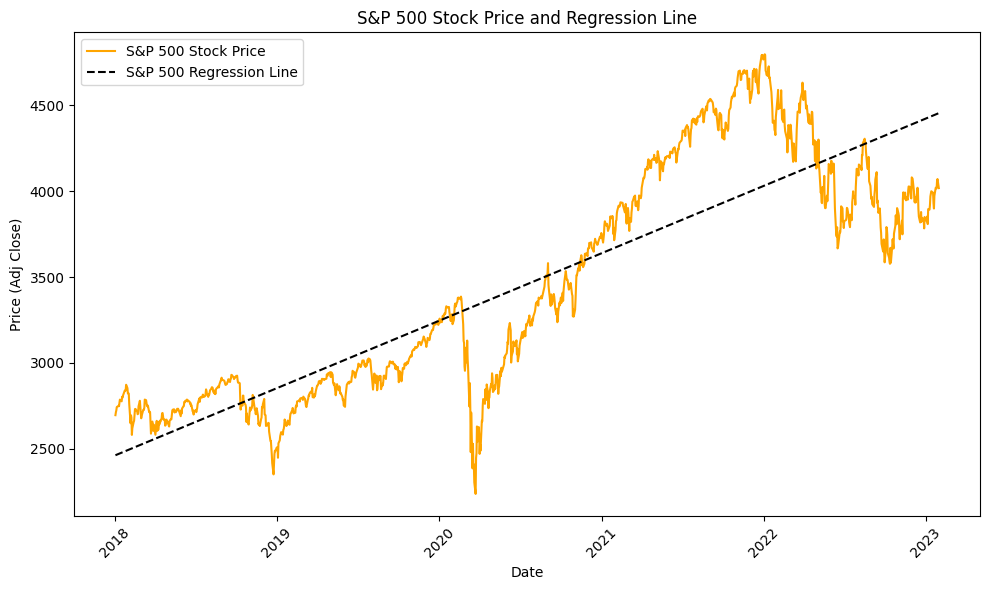

Regression Analysis for S&P 500:
Slope (Trend): 1.0741799575107853
Intercept: -788881.4662798372



In [567]:
from sklearn.linear_model import LinearRegression

# Function to perform linear regression and plot the results
def plot_regression(df, stock_name, color):
    # Convert 'Date' to ordinal (necessary for regression analysis)
    df['Date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
    
    # Reshape the data for sklearn
    X = df['Date_ordinal'].values.reshape(-1, 1)
    y = df['Adj Close'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Plot stock prices and regression line
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Adj Close'], label=f'{stock_name} Stock Price', color=color)
    plt.plot(df['Date'], y_pred, label=f'{stock_name} Regression Line', color='black', linestyle='--')
    
    # Add labels and title
    plt.title(f'{stock_name} Stock Price and Regression Line')
    plt.xlabel('Date')
    plt.ylabel('Price (Adj Close)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print the slope and intercept
    print(f'Regression Analysis for {stock_name}:')
    print(f'Slope (Trend): {model.coef_[0]}')
    print(f'Intercept: {model.intercept_}')
    print()

# Run regression analysis for each stock and plot the results
plot_regression(msft_df, 'Microsoft (MSFT)', 'blue')
plot_regression(apple_df, 'Apple (AAPL)', 'red')
plot_regression(tesla_df, 'Tesla (TSLA)', 'green')
plot_regression(sp500_df, 'S&P 500', 'orange')


In [568]:
# Calculate the correlation between each stock and the S&P 500
correlation_msft_sp500 = msft_df['Adj Close'].corr(sp500_df['Adj Close'])
correlation_apple_sp500 = apple_df['Adj Close'].corr(sp500_df['Adj Close'])
correlation_tesla_sp500 = tesla_df['Adj Close'].corr(sp500_df['Adj Close'])

print(f"Correlation between MSFT and S&P 500: {correlation_msft_sp500}")
print(f"Correlation between AAPL and S&P 500: {correlation_apple_sp500}")
print(f"Correlation between TSLA and S&P 500: {correlation_tesla_sp500}")


Correlation between MSFT and S&P 500: 0.9674898796733767
Correlation between AAPL and S&P 500: 0.9527950444211464
Correlation between TSLA and S&P 500: 0.9417350380322274


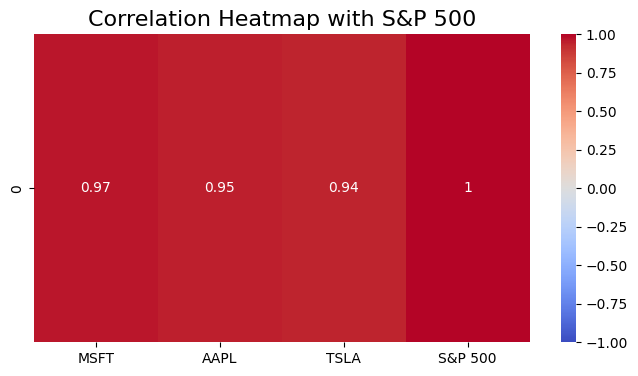

In [569]:
import seaborn as sns

# Create a correlation DataFrame
correlation_data = {
    'MSFT': [correlation_msft_sp500],
    'AAPL': [correlation_apple_sp500],
    'TSLA': [correlation_tesla_sp500],
    'S&P 500': [1]  # Correlation of S&P 500 with itself is always 1
}

correlation_df = pd.DataFrame(correlation_data)

# Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap with S&P 500', fontsize=16)
plt.savefig(r'C:\Users\kaspg\Desktop\plot15.png')
plt.show()


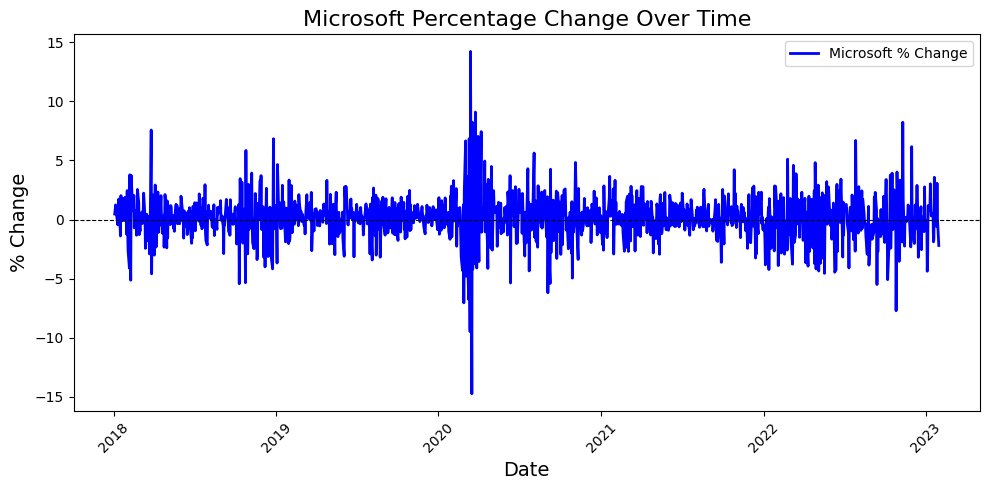

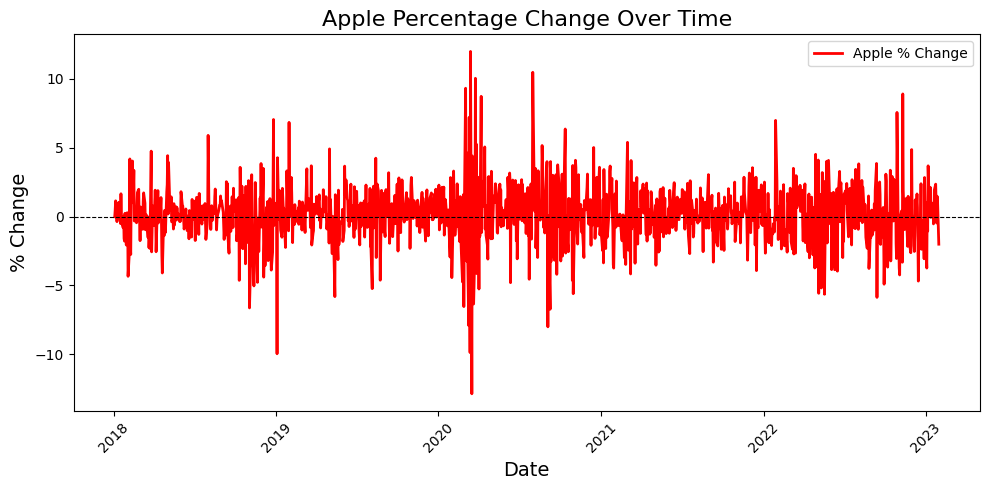

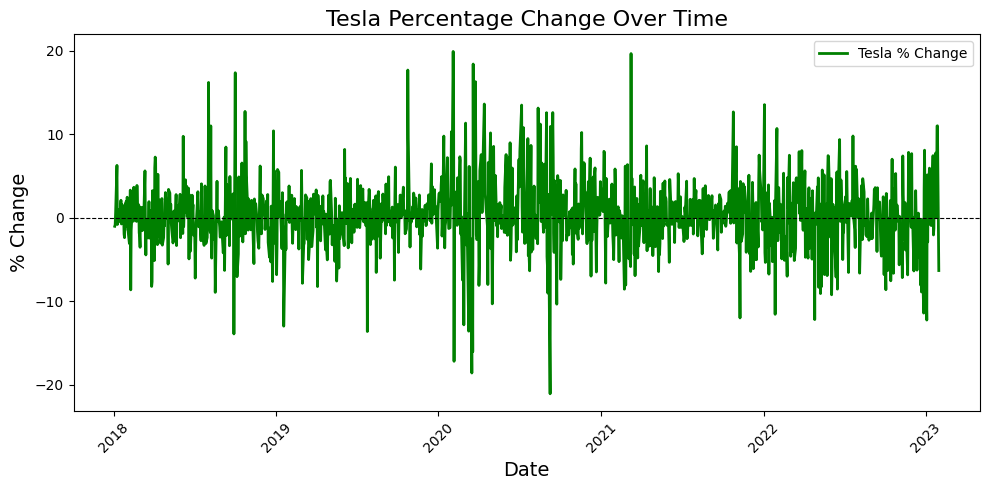

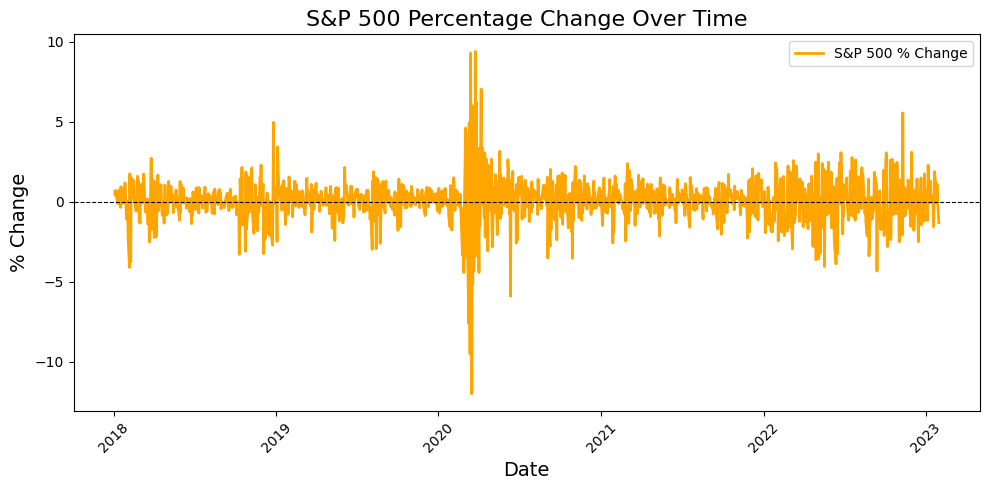

In [570]:
# Calculate the percentage change for each stock
msft_df['% Change'] = msft_df['Adj Close'].pct_change() * 100
apple_df['% Change'] = apple_df['Adj Close'].pct_change() * 100
tesla_df['% Change'] = tesla_df['Adj Close'].pct_change() * 100
sp500_df['% Change'] = sp500_df['Adj Close'].pct_change() * 100

# Convert Date columns to datetime format
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

# Plotting each stock's percentage change in a separate chart with specific colors and no gridlines
stocks = {
    "Microsoft": (msft_df, 'blue'),      # Microsoft in blue
    "Apple": (apple_df, 'red'),          # Apple in red
    "Tesla": (tesla_df, 'green'),        # Tesla in green
    "S&P 500": (sp500_df, 'orange')      # S&P 500 in orange
}

for stock_name, (stock_data, color) in stocks.items():
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['% Change'], label=f'{stock_name} % Change', color=color, linewidth=2)
    plt.title(f'{stock_name} Percentage Change Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('% Change', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at 0% change
    # plt.grid()  # Commenting out the grid line
    plt.tight_layout()
    plt.legend()
    plt.show()


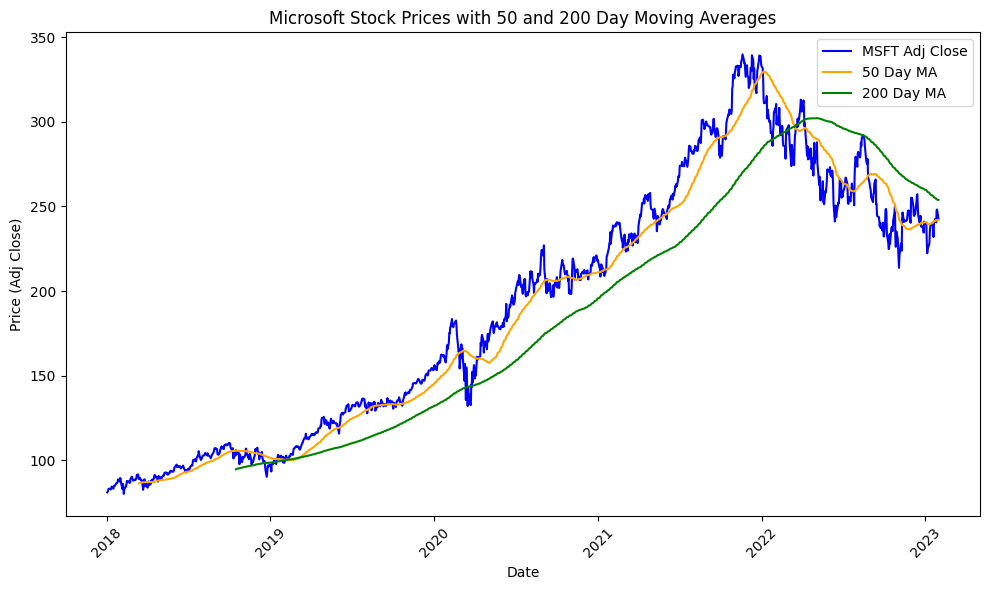

In [571]:
# Adding a 50-day and 200-day Moving Average to the Microsoft Stock Prices
msft_df['50_MA'] = msft_df['Adj Close'].rolling(window=50).mean()
msft_df['200_MA'] = msft_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(msft_df['Date'], msft_df['Adj Close'], label='MSFT Adj Close', color='blue')
plt.plot(msft_df['Date'], msft_df['50_MA'], label='50 Day MA', color='orange')
plt.plot(msft_df['Date'], msft_df['200_MA'], label='200 Day MA', color='green')
plt.title('Microsoft Stock Prices with 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot120.png')
plt.show()



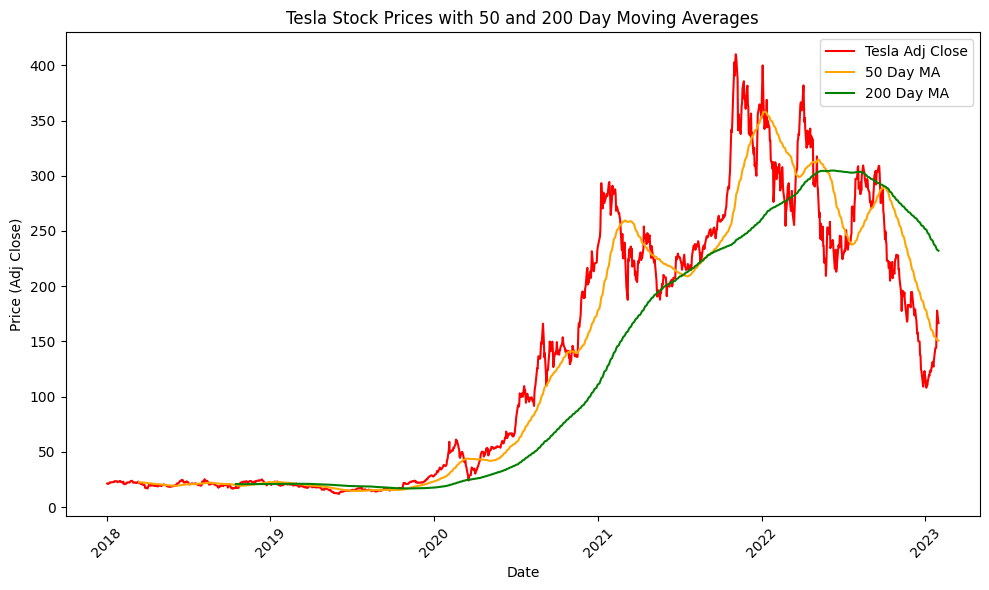

In [572]:
# Adding a 50-day and 200-day Moving Average to the tesla Stock Prices
tesla_df['50_MA'] = tesla_df['Adj Close'].rolling(window=50).mean()
tesla_df['200_MA'] = tesla_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(tesla_df['Date'], tesla_df['Adj Close'], label='Tesla Adj Close', color='red')
plt.plot(tesla_df['Date'], tesla_df['50_MA'], label='50 Day MA', color='orange')
plt.plot(tesla_df['Date'], tesla_df['200_MA'], label='200 Day MA', color='green')
plt.title('Tesla Stock Prices with 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot16.png')
plt.show()


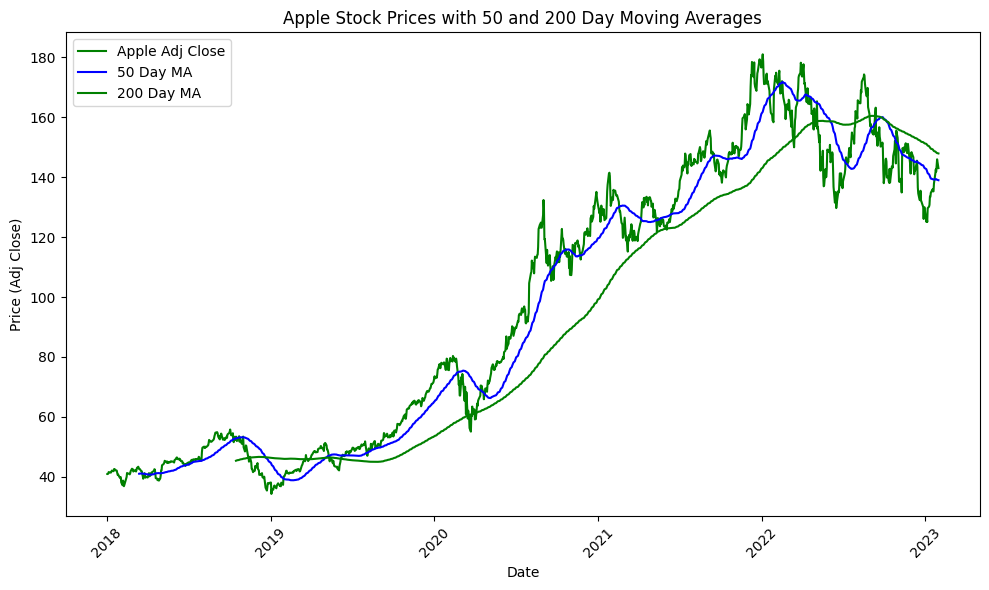

In [573]:
# Adding a 50-day and 200-day Moving Average to the Apple Stock Prices
apple_df['50_MA'] = apple_df['Adj Close'].rolling(window=50).mean()
apple_df['200_MA'] = apple_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(apple_df['Date'], apple_df['Adj Close'], label='Apple Adj Close', color='green')
plt.plot(apple_df['Date'], apple_df['50_MA'], label='50 Day MA', color='blue')
plt.plot(apple_df['Date'], apple_df['200_MA'], label='200 Day MA', color='green')
plt.title('Apple Stock Prices with 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot17.png')
plt.show()


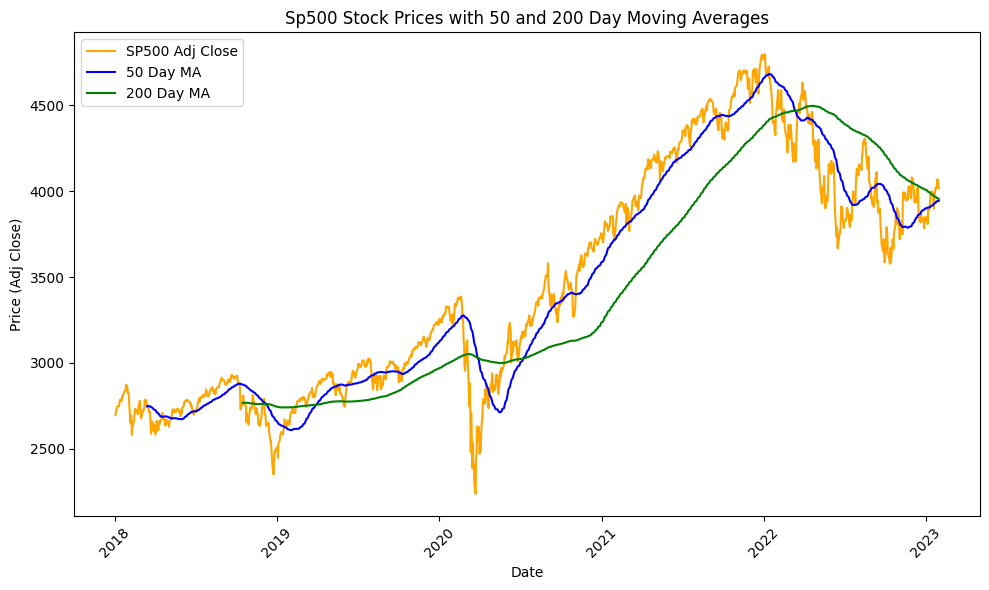

In [574]:
# Adding a 50-day and 200-day Moving Average to the Sp500 Stock Prices
sp500_df['50_MA'] = sp500_df['Adj Close'].rolling(window=50).mean()
sp500_df['200_MA'] = sp500_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(sp500_df['Date'], sp500_df['Adj Close'], label='SP500 Adj Close', color='orange')
plt.plot(sp500_df['Date'], sp500_df['50_MA'], label='50 Day MA', color='blue')
plt.plot(sp500_df['Date'], sp500_df['200_MA'], label='200 Day MA', color='green')
plt.title('Sp500 Stock Prices with 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (Adj Close)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\kaspg\Desktop\plot18.png')
plt.show()
